# Data exporation
For the data 2018-2022

Made by: Elsa Kidman

In [ ]:
import json
f = open('../../data/data 2018-09-09 2022-09-11/data_FINAL_2018-09-09_to_2022-09-11.json')
data_init = json.load(f)

In [ ]:
data_init[0]

{'id_': 'h911987',
 'question': 'av Betty Malmberg (M)\ntill Utbildningsminister Anna Ekström (S)\n\xa0\nÅr 2010 antog Europaparlamentet det så kallade djurförsöksdirektivet (2010/63/EU). Syftet med direktivet är att de försök som i dag görs på levande djur i antingen vetenskapliga eller utbildningsmässiga sammanhang ska ersättas med djurfria metoder, där det är vetenskapligt möjligt.\nNederländerna har redan antagit en strategi för detta som innebär att de fram till 2025 ska ha fasat ut många av djurförsöken samt ha antagit olika handlingsplaner för att minska djurförsök inom bland annat grundforskning. Nederländernas initiativ är mycket intressant ur flera aspekter såsom etik, effektivitet och ekonomi. Det är också högst rimligt eftersom det i dag finns alternativa sätt för att utveckla läkemedel som är mer effektiva och som dessutom kan korta processerna för framtagande av desamma. Det kan vara via studier på levande celler, i provrör eller genom beräkningsmodeller i datorn. Det inn

In [ ]:
empty_answers = []
empty_questions = []
short_questions = []


for entry in data_init:
  answer = entry['answer']
  question = entry['question']
  if len(answer) == 0:
    empty_answers.append(answer)
  if len(question) == 0:
    empty_questions.append(question)
  if len(question) < 250:
    short_questions.append(question)

print(f"Entries with empty answers: {len(empty_answers)}\n")

print(f"Entries with empty questions: {len(empty_questions)}\n")

print(f"Examples of short question: \n{short_questions[0]}")

Entries with empty answers: 27

Entries with empty Answers: 0

Examples of short question: 
av Jonas Andersson i Linghem (SD)
till Utbildningsminister Anna Ekström (S)
 
Vilka åtgärder vidtar ministern för att säkerställa att grova brottslingar inte gynnas och får en plattform hos studieförbund med hjälp av statsbidrag till folkbildningen?


## Word count

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

questions = []
questions_tokenized = []
questions_length = []

answers = []
answers_tokenized = []
answers_length = []

for entry in data_init:
  question = entry['question']
  answer = entry['answer']

  questions.append(question)
  answers.append(answer)

  # Tokenize the text
  words_question = word_tokenize(question, language='swedish')
  # Lowercase
  words_question = [word.lower() for word in words_question]
  questions_tokenized.append(words_question)

  # Tokenize the text
  words_answer = word_tokenize(answer, language='swedish')
  # Lowercase
  words_answer = [word.lower() for word in words_answer]
  answers_tokenized.append(words_answer)

  # question length
  questions_length.append(len(words_question))
  answers_length.append(len(words_answer))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(f"The longest question length is: {max(questions_length)}")
print(f"The longest answer length is: {max(answers_length)}\n")

flattened_questions = [item for sublist in questions_tokenized for item in sublist]
flattened_answers = [item for sublist in answers_tokenized for item in sublist]

print(f"Nr of words in total: {len(flattened_questions)}")
print(f"Nr of words in total: {len(flattened_answers)}\n")

print(f"Nr of unique words in questions: {len(set(flattened_questions))}")
print(f"Nr of unique words in answers: {len(set(flattened_answers))}")

The longest question length is: 1365
The longest answer length is: 1214

Nr of words in total: 1753073
Nr of words in total: 1988189

Nr of unique words in questions: 68029
Nr of unique words in answers: 56968


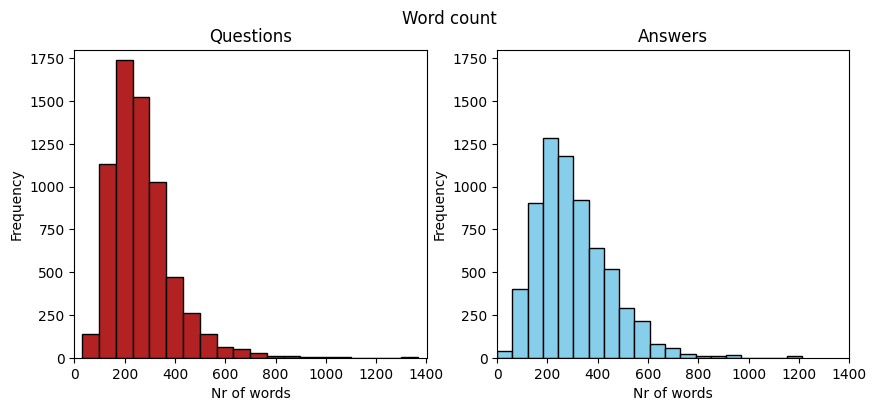

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(questions_length, bins=20, color='firebrick', edgecolor='black')
axs[0].set_title('Questions')
axs[0].set_xlim(0, 1401)
axs[0].set_ylim(0, 1801)
axs[0].set_xlabel('Nr of words')
axs[0].set_ylabel('Frequency')

axs[1].hist(answers_length, bins=20, color='skyblue', edgecolor='black')
axs[1].set_title('Answers')
axs[1].set_xlim(0, 1401)
axs[1].set_ylim(0, 1801)
axs[1].set_xlabel('Nr of words')
axs[1].set_ylabel('Frequency')

fig.suptitle('Word count')
plt.show()


In [ ]:
from nltk.stem import SnowballStemmer
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

# A function to remove to/from formalia from each question.
def remove_names(question):

    ## Remove the first two lines
    lines = question.split('\n')[2:]
    result = '\n'.join(lines)

    return result

# Remove swedish Stop Words
def remove_stopwords(text):

    stopword_custom = stopwords.words('swedish')
    stop_list = ["ska", "ske", "det", "vore", "samt"] # "se", "ge"
    stopword_custom.extend(stop_list)
    stop_words = set(stopword_custom)
    result = [word for word in text if word not in stop_words]
    return result

# Apply stemming for swedish
def stemming(text):

    stemmer = SnowballStemmer("swedish")
    resuling_text = [stemmer.stem(plural) for plural in text]
    return resuling_text

# Filters out all special characters, punktation etc. Only letters and numers left
def filter_bad_characters(tokens):

    # Regular expression can be used only get tokens containing letters and  numbers. Unicode is needed for å,ä,ö
    cleaned_tokens = [token for token in tokens if re.match(r'^[\wåäö]+$', token, flags=re.UNICODE)]
    return cleaned_tokens

def preprocess(text):

    # Tokenize the text
    words = word_tokenize(text, language='swedish')
    # Lowercase
    lowercase_words = [word.lower() for word in words]

    # Remove stop words
    stop_words_removed = remove_stopwords(lowercase_words)

    # Remove special characters and punktation
    cleaned_tokens = filter_bad_characters(stop_words_removed)

    #Apply stemming
    filtered_words = cleaned_tokens#stemming(cleaned_tokens)

    # contains the preprocessed tokens.
    return filtered_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
questions_tokenized_updated = []
questions_len_updated = []

answers_tokenized_updated = []
answers_len_updated = []

for entry in data_init:
  question = entry['question']
  answer = entry['answer']

  question_preproc = preprocess(question)
  questions_tokenized_updated.append(question_preproc)
  questions_len_updated.append(len(question_preproc))

  answer_preproc = preprocess(answer)
  answers_tokenized_updated.append(answer_preproc)
  answers_len_updated.append(len(answer_preproc))

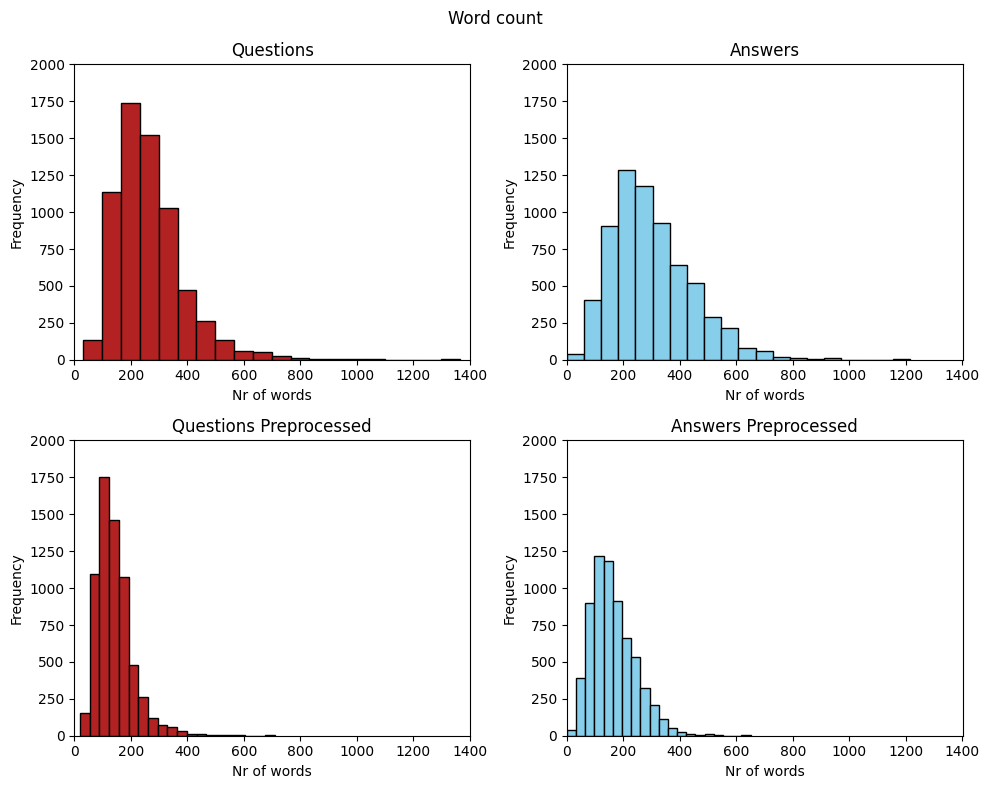

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].hist(questions_length, bins=20, color='firebrick', edgecolor='black')
axs[0,0].set_title('Questions')
axs[0,0].set_xlim(0, 1401)
axs[0,0].set_ylim(0, 2001)
axs[0,0].set_xlabel('Nr of words')
axs[0,0].set_ylabel('Frequency')

axs[0,1].hist(answers_length, bins=20, color='skyblue', edgecolor='black')
axs[0,1].set_title('Answers')
axs[0,1].set_xlim(0, 1401)
axs[0,1].set_ylim(0, 2001)
axs[0,1].set_xlabel('Nr of words')
axs[0,1].set_ylabel('Frequency')

axs[1,0].hist(questions_len_updated, bins=20, color='firebrick', edgecolor='black')
axs[1,0].set_title('Questions Preprocessed')
axs[1,0].set_xlim(0, 1401)
axs[1,0].set_ylim(0, 2001)
axs[1,0].set_xlabel('Nr of words')
axs[1,0].set_ylabel('Frequency')

axs[1,1].hist(answers_len_updated, bins=20, color='skyblue', edgecolor='black')
axs[1,1].set_title('Answers Preprocessed')
axs[1,1].set_xlim(0, 1401)
axs[1,1].set_ylim(0, 2001)
axs[1,1].set_xlabel('Nr of words')
axs[1,1].set_ylabel('Frequency')

fig.suptitle('Word count')
plt.tight_layout()
plt.show()


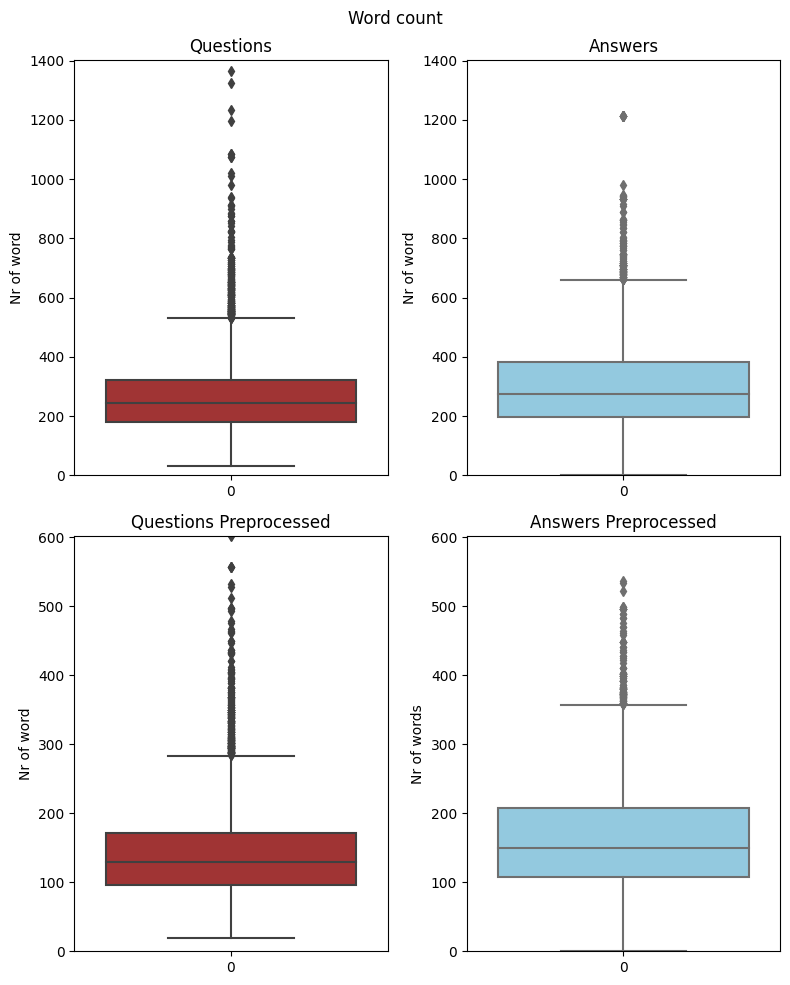

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(8, 10))
sns.boxplot(data=questions_length, ax=axs[0,0], color='firebrick')
axs[0,0].set_title('Questions')
axs[0,0].set_ylim(0, 1401)
# axs[0,0].set_ylim(0, 2001)
#axs[0,0].set_xlabel('Nr of words')
axs[0,0].set_ylabel('Nr of word')

sns.boxplot(data=answers_length, ax=axs[0,1], color='skyblue')
axs[0,1].set_title('Answers')
axs[0,1].set_ylim(0, 1401)
# axs[0,1].set_ylim(0, 2001)
#Nr of wordaxs[0,1].set_xlabel('Nr of words')
axs[0,1].set_ylabel('Nr of word')

sns.boxplot(data=questions_len_updated, ax=axs[1,0], color='firebrick')
axs[1,0].set_title('Questions Preprocessed')
# axs[1,0].set_xlim(0, 1401)
axs[1,0].set_ylim(0, 601)
#axs[1,0].set_xlabel('Nr of words')
axs[1,0].set_ylabel('Nr of word')

sns.boxplot(data=answers_len_updated, ax=axs[1,1], color='skyblue')
axs[1,1].set_title('Answers Preprocessed')
# axs[1,1].set_xlim(0, 1401)
axs[1,1].set_ylim(0, 601)
#axs[1,1].set_xlabel('Nr of words')
axs[1,1].set_ylabel('Nr of words')

fig.suptitle('Word count')
plt.tight_layout()
plt.show()


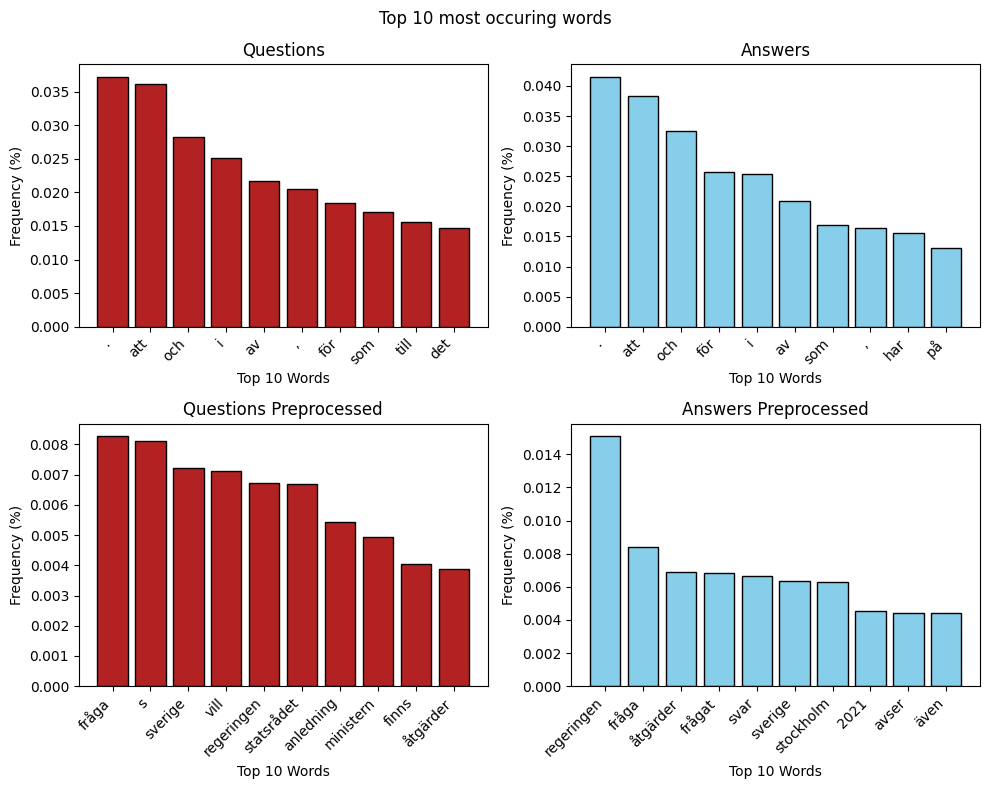

In [ ]:
from collections import Counter

# Get the word count for the flattend lists of words for questions and answers.
n = 10
top_words_q = Counter(flattened_questions).most_common(n)
top_words_q = [(word, (count / len(flattened_questions))) for word, count in top_words_q]

top_words_a = Counter(flattened_answers).most_common(n)
top_words_a = [(word, (count / len(flattened_answers))) for word, count in top_words_a]

flattened_questions_preproc = [item for sublist in questions_tokenized_updated for item in sublist]
top_words_q_preproc = Counter(flattened_questions_preproc).most_common(n)
top_words_q_preproc = [(word, (count / len(flattened_questions_preproc))) for word, count in top_words_q_preproc]

flattened_answers_preproc = [item for sublist in answers_tokenized_updated for item in sublist]
top_words_a_preproc = Counter(flattened_answers_preproc).most_common(n)
top_words_a_preproc = [(word, (count / len(flattened_answers_preproc))) for word, count in top_words_a_preproc]

# Create a plot of four subplots representing questions and answers before and after preprocessing. Note: that after preprocessing stopwords and special characters have been removed
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

words_q, counts_q = zip(*top_words_q)
axs[0,0].bar(words_q, counts_q, color='firebrick', edgecolor='black')
axs[0,0].set_title('Questions')
axs[0,0].set_xticks(range(0,10,1))
axs[0,0].set_xticklabels(words_q, rotation=45, ha='right')
axs[0,0].set_xlabel('Top 10 Words')
axs[0,0].set_ylabel('Frequency (%)')

words_a, counts_a = zip(*top_words_a)
axs[0,1].bar(words_a, counts_a, color='skyblue', edgecolor='black')
axs[0,1].set_title('Answers')
axs[0,1].set_xticks(range(0,10,1))
axs[0,1].set_xticklabels(words_a, rotation=45, ha='right')
axs[0,1].set_xlabel('Top 10 Words')
axs[0,1].set_ylabel('Frequency (%)')

words_q_preproc, counts_q_preproc = zip(*top_words_q_preproc)
axs[1,0].bar(words_q_preproc, counts_q_preproc, color='firebrick', edgecolor='black')
axs[1,0].set_title('Questions Preprocessed')
axs[1,0].set_xticks(range(0,10,1))
axs[1,0].set_xticklabels(words_q_preproc, rotation=45, ha='right')
axs[1,0].set_xlabel('Top 10 Words')
axs[1,0].set_ylabel('Frequency (%)')

words_a_preproc, counts_a_preproc = zip(*top_words_a_preproc)
axs[1,1].bar(words_a_preproc, counts_a_preproc, color='skyblue', edgecolor='black')
axs[1,1].set_title('Answers Preprocessed')
axs[1,1].set_xticks(range(0,10,1))
axs[1,1].set_xticklabels(words_a_preproc, rotation=45, ha='right')
axs[1,1].set_xlabel('Top 10 Words')
axs[1,1].set_ylabel('Frequency (%)')

fig.suptitle('Top 10 most occuring words')
plt.tight_layout()
plt.show()


## By party

In [ ]:
data_init[0]

{'id_': 'h911987',
 'question': 'av Betty Malmberg (M)\ntill Utbildningsminister Anna Ekström (S)\n\xa0\nÅr 2010 antog Europaparlamentet det så kallade djurförsöksdirektivet (2010/63/EU). Syftet med direktivet är att de försök som i dag görs på levande djur i antingen vetenskapliga eller utbildningsmässiga sammanhang ska ersättas med djurfria metoder, där det är vetenskapligt möjligt.\nNederländerna har redan antagit en strategi för detta som innebär att de fram till 2025 ska ha fasat ut många av djurförsöken samt ha antagit olika handlingsplaner för att minska djurförsök inom bland annat grundforskning. Nederländernas initiativ är mycket intressant ur flera aspekter såsom etik, effektivitet och ekonomi. Det är också högst rimligt eftersom det i dag finns alternativa sätt för att utveckla läkemedel som är mer effektiva och som dessutom kan korta processerna för framtagande av desamma. Det kan vara via studier på levande celler, i provrör eller genom beräkningsmodeller i datorn. Det inn

In [ ]:
parties_questions_count = {'S':0, 'V':0, 'MP':0, 'C':0, 'L':0, 'M':0, 'KD':0, 'SD':0, '-':0}
parties_answers_count = {'S':0, 'V':0, 'MP':0, 'C':0, 'L':0, 'M':0, 'KD':0, 'SD':0, '-':0}

parties_questions_len = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}
parties_answers_len = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}

parties_questions_words = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}
parties_answers_words = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}

for entry in data_init:
  party_question = entry['undertecknare_partibet']
  party_answer = entry['besvaradav_partibet']

  question = entry['question']
  answer = entry['answer']
  parties_questions_count[party_question] +=1
  parties_answers_count[party_answer] += 1

  # Tokenize and Lowercase the text.
  words_question = word_tokenize(question, language='swedish')
  words_question = [word.lower() for word in words_question]

  words_answer = word_tokenize(answer, language='swedish')
  words_answer = [word.lower() for word in words_answer]

  # Choose to have preprocessed or not. Comment out this or the above
  words_question = preprocess(question)
  words_answer = preprocess(answer)

  # Take the length of each question and answer for each party
  parties_questions_len[party_question].append(len(words_question))
  parties_answers_len[party_answer].append(len(words_answer))

  parties_questions_words[party_question].append(words_question)
  parties_answers_words[party_answer].append(words_answer)


In [ ]:
len(parties_questions_len['S'])

230

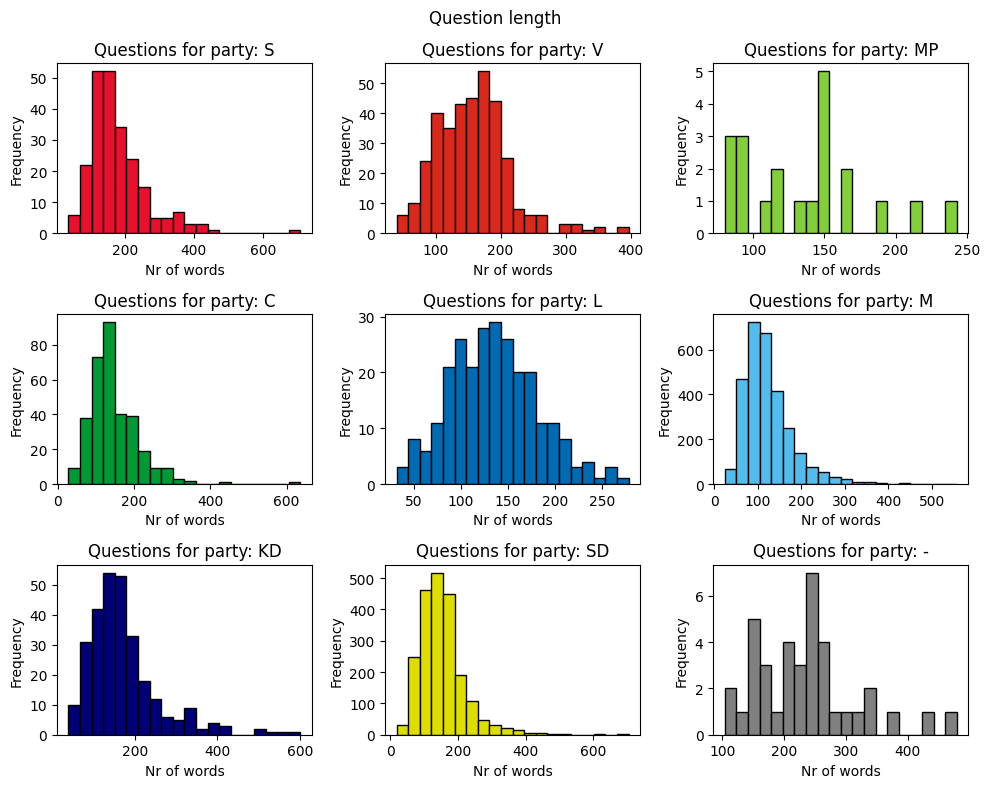

In [ ]:
party_color = {'S':"#E8112d", 'V':"#DA291C", 'MP':"#83CF39", 'C':"#009933", 'L': "#006AB3", 'M':"#52BDEC", 'KD':"#000077", 'SD': "#DDDD00", '-': "gray"}

fig, axs = plt.subplots(3, 3, figsize=(10, 8))
axs = axs.flatten()

for i, (key, value) in enumerate(parties_questions_len.items()):

  axs[i].hist(value, bins=20, edgecolor='black', color=party_color[key])
  axs[i].set_title(f'Questions for party: {key}')
  # axs[i].set_xlim(0, 1401)
  # axs[i].set_ylim(0, 2001)
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')


fig.suptitle('Question length')
plt.tight_layout()
plt.show()

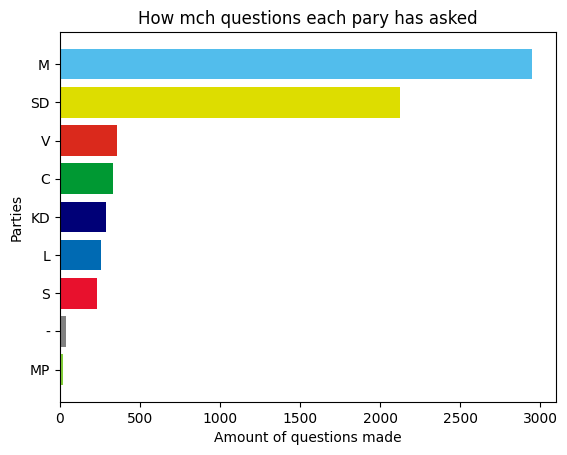

In [ ]:
sorted_parties_q = sorted(parties_questions_count.items(), key=lambda x: x[1], reverse=False)

parties, party_questions = zip(*sorted_parties_q)

plt.barh(parties, party_questions, color=[party_color[party] for party in parties])

plt.xlabel('Amount of questions made')
plt.ylabel("Parties")
plt.title('How mch questions each party has asked')

plt.show()

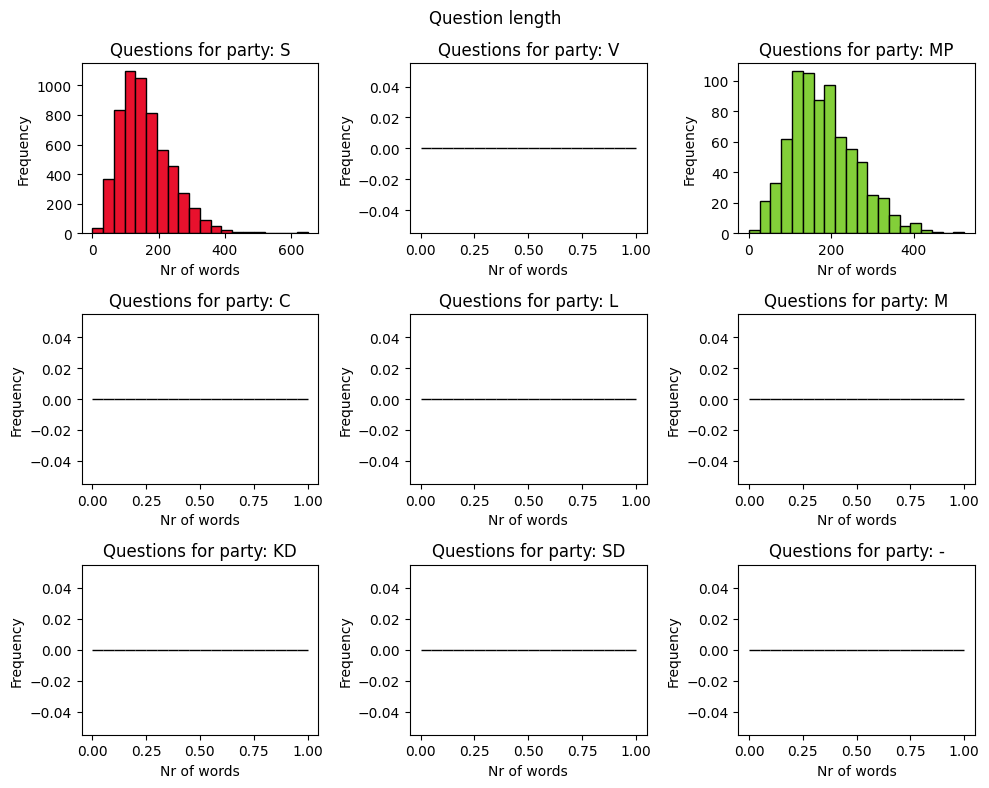

In [ ]:

fig, axs = plt.subplots(3, 3, figsize=(10, 8))
axs = axs.flatten()

for i, (key, value) in enumerate(parties_answers_len.items()):

  axs[i].hist(value, bins=20, edgecolor='black', color=party_color[key])
  axs[i].set_title(f'Answer for party: {key}')
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')

fig.suptitle('Answer lengths')
plt.tight_layout()
plt.show()

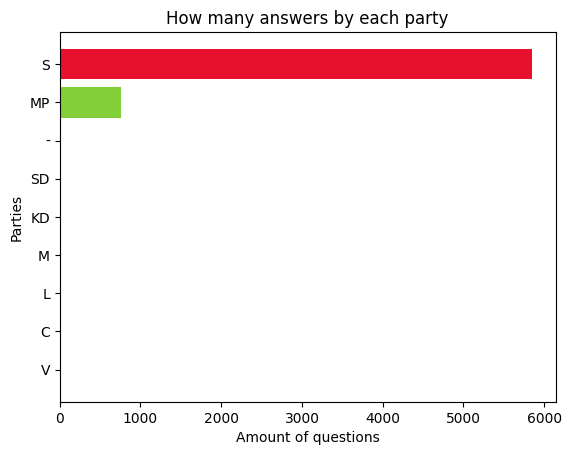

In [ ]:
sorted_parties_answers = sorted(parties_answers_count.items(), key=lambda x: x[1], reverse=False)

parties, answers_count = zip(*sorted_parties_answers)

plt.barh(parties, answers_count,  color=[party_color[party] for party in parties])

plt.xlabel('Amount of questions')
plt.ylabel("Parties")
plt.title('How many answers by each party')

plt.show()